In [184]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [186]:
file_path='/kaggle/input/housedata/data.csv'
df=pd.read_csv(file_path)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [187]:
df.shape

(4600, 18)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [190]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [191]:
df.duplicated().sum()

0

In [192]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_renovated     0.028774
yr_built         0.021857
dtype: float64

In [193]:
df['date']=pd.to_datetime(df['date'])

In [217]:
df['city'].value_counts()

Seattle                1246
Renton                  240
Bellevue                171
Redmond                 155
Kent                    149
Kirkland                140
Issaquah                128
Auburn                  126
Federal Way             124
Shoreline               107
Sammamish               101
Maple Valley             82
Kenmore                  56
Burien                   52
Snoqualmie               45
Woodinville              43
Des Moines               38
Mercer Island            35
Covington                35
North Bend               33
Duvall                   29
Bothell                  27
Newcastle                26
SeaTac                   22
Lake Forest Park         22
Tukwila                  21
Enumclaw                 14
Normandy Park             9
Black Diamond             6
Pacific                   6
Carnation                 5
Algona                    4
Vashon                    4
Fall City                 3
Milton                    2
Yarrow Point        

In [221]:
df['statezip'].value_counts()

WA 98103    129
WA 98117    119
WA 98052    113
WA 98115    112
WA 98133     88
           ... 
WA 98354      2
WA 98288      1
WA 98068      1
WA 98051      1
WA 98050      1
Name: statezip, Length: 76, dtype: int64

In [194]:
def histPlot(df,column):
    '''
    input  DataFrame, column
    output Histogram plot
    '''
    
    plt.figure()
    sns.histplot(df[column],kde=True)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()

In [195]:
num_val=[]
cat_val=[]

for col in df.columns:
    if df[col].dtypes=='object':
        cat_val.append(col)
    else:
        num_val.append(col)

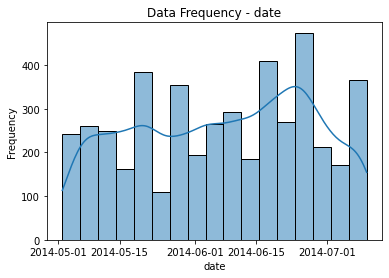

None


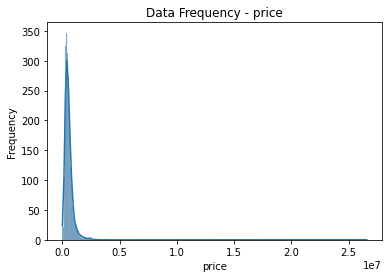

None


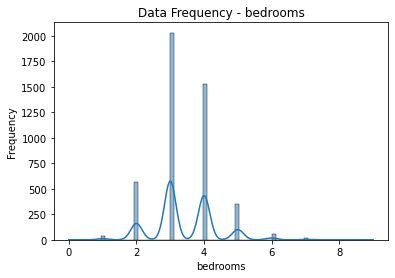

None


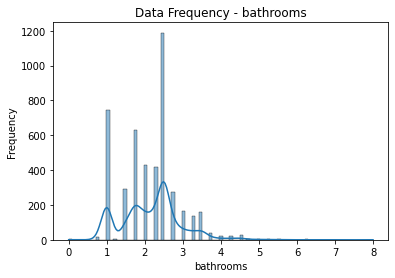

None


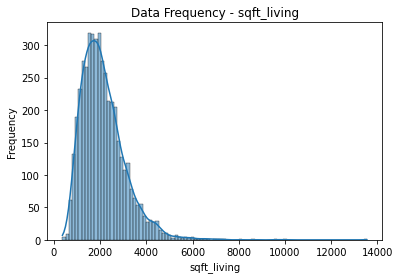

None


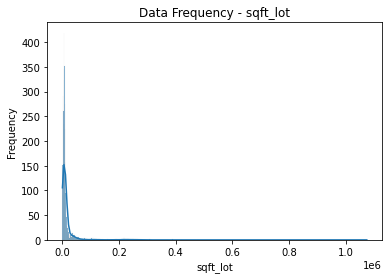

None


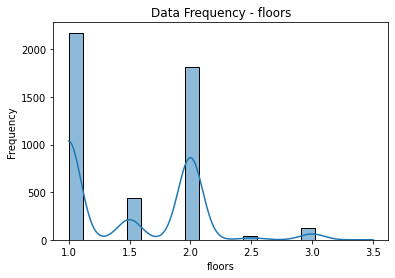

None


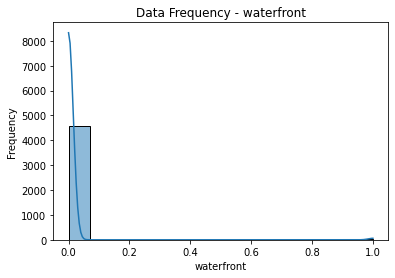

None


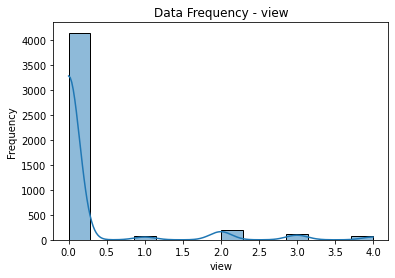

None


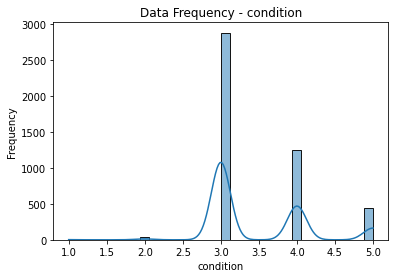

None


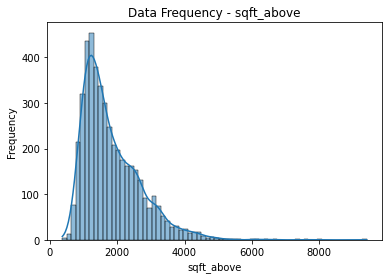

None


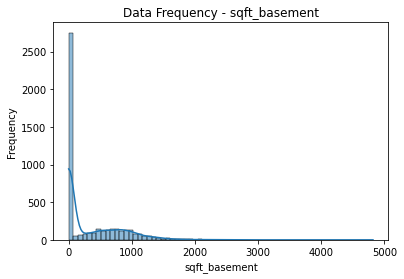

None


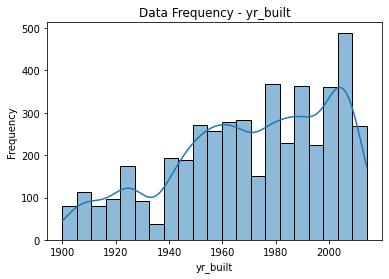

None


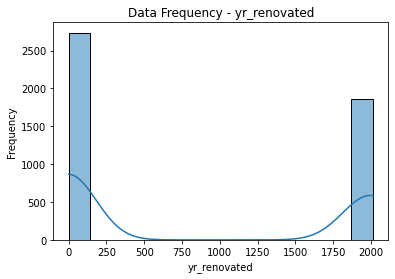

None


In [196]:
for i in num_val:
    print(histPlot(df,i))

In [197]:
def removeOutliers(df, columns):
    outlier_indices = []
    
    for c in columns:
        # first quartile
        Q1 = np.percentile(df[c],25)
        # third quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # multiplier for outlier detection
        outlier_step = IQR * 1.5
        # detect outlier and outlier index
        idx = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        df.drop(idx,axis=0,inplace=True)
        
  
    
removeOutliers(df,num_val)    

In [198]:
num_val[9]

'condition'

<AxesSubplot:xlabel='floors', ylabel='price'>

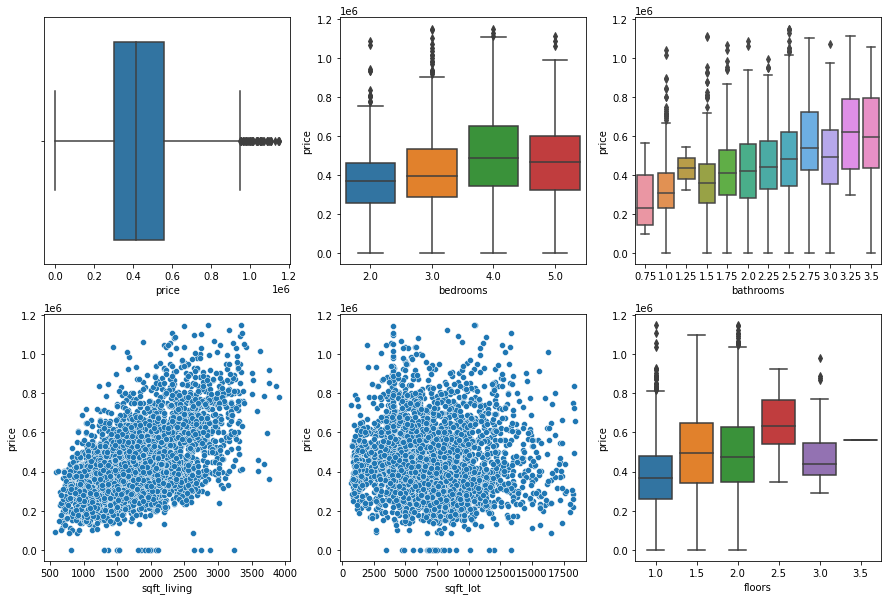

In [199]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

sns.boxplot(data=df,x='price',ax=ax[0,0])
sns.boxplot(data=df,x='bedrooms',y='price',ax=ax[0,1])
sns.boxplot(data=df,x='bathrooms',y='price',ax=ax[0,2])
sns.scatterplot(data=df,x='sqft_living',y='price',ax=ax[1,0])
sns.scatterplot(data=df,x='sqft_lot',y='price',ax=ax[1,1])
sns.boxplot(data=df,x='floors',y='price',ax=ax[1,2])





In [200]:
df.corrwith(df['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.542249
sqft_above       0.443587
bathrooms        0.380710
floors           0.261108
bedrooms         0.224354
sqft_basement    0.178790
condition        0.070595
yr_built        -0.007865
sqft_lot        -0.062454
yr_renovated    -0.082547
waterfront            NaN
view                  NaN
dtype: float64

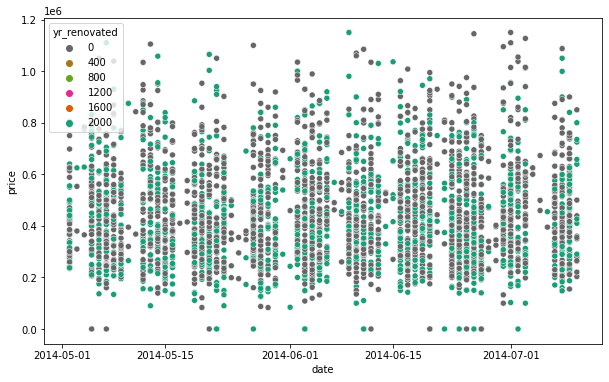

In [201]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='date',y='price',hue='yr_renovated',palette='Dark2_r')
plt.show()

In [212]:
df['price']=df['price'].round(2)